# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import *
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
from matplotlib import style
from joblib import load
import sklearn as sk
import plotly.graph_objects as go
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
import timeit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot


2022-12-03 14:55:51.689570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 14:55:51.823583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 14:55:51.823598: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 14:55:51.850265: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-03 14:55:52.633745: W tensorflow/stream_executor/platform/de

In [2]:
# Dataset Train preprocesado
ds_train = pd.read_csv('datasets/tp1-train_id.csv')
ds_train = ds_train.drop(['Unnamed: 0'], axis=1)
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,AkvIZkI7XvbCQ/Z7zZ7lXw==,2021-07-29,2021-09-06 00:00:00.000000000,-34.564800,-58.444631,Belgrano,Departamento,5.0,4.0,279.0,245.0,1000000.0,Espectacular torre en la mejor zona de Belgran...
1,fPYqaGC1CO4tGa5Lfbsfxw==,2021-12-16,2022-02-09 00:00:00.000000000,-34.591359,-58.418809,Palermo,Departamento,2.0,1.0,42.0,42.0,89900.0,VENTA 2 AMBIENTES RECICLADO - PALERMO
2,iEf87GrVMz/FhIPsQTns4w==,2021-06-19,2021-09-01 15:14:13.531306906,-34.602632,-58.428399,Almagro,Departamento,2.0,1.0,46.0,42.0,119900.0,2 ambientes al frente con balcón. A estrenar.
3,po58pOgih96xIX9iBLCejA==,2021-12-16,2022-02-09 00:00:00.000000000,-34.564290,-58.439272,Palermo,Departamento,3.0,2.0,69.0,58.0,175000.0,DEPARTAMENTO 3 Ambientes Palermo-Balcón C/Parr...
4,GNPH2InKGIZ3mGgnJGK9HQ==,2021-12-16,2022-02-09 00:00:00.000000000,-34.630517,-58.377143,Barracas,Departamento,1.0,1.0,45.0,41.0,120000.0,Venta-Barracas-Mono divisible- MOCA


In [3]:
# Dataset Test preprocesado
ds_test = pd.read_csv('datasets/tp1-test_id.csv')
ds_test = ds_test.drop(['Unnamed: 0'], axis=1)
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,alZlUcnGhQjicsCUrLelUg==,NaN,NaN,-34.589649,-58.434926,Palermo,Casa,4.0,3.0,140.0,140.0,530000.0,Casa - Palermo
1,MizJ7379YN8pr1oUXkuoJQ==,NaN,NaN,-34.598508,-58.443084,Villa Crespo,Departamento,1.0,1.0,33.0,30.0,78000.0,Monoambiente Departamento a Estrenar - Villa C...
2,WjEJRWaB6ZSmhsePTNh9Cg==,NaN,NaN,-34.582098,-58.448859,Palermo,Departamento,1.0,1.0,35.0,30.0,87100.0,Venta - Newbery Jorge 3445 3º I Jardin
3,zTFHwNW12MiipUveEst26g==,NaN,NaN,-34.569662,-58.487762,Villa Urquiza,Departamento,3.0,2.0,80.0,68.0,250000.0,Departamento - Villa Urquiza
4,UajHnX8NrKB2DNhHfsNi5Q==,NaN,NaN,-34.598582,-58.376689,San Nicolás,Departamento,2.0,1.0,37.0,37.0,79000.0,Venta de departamento estilo frances de 2 amb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,lDeKHBlacLmv2ZH7xigDpA==,NaN,NaN,-34.652357,-58.385489,Barracas,Casa,5.0,4.0,223.0,223.0,295000.0,CASA EN LOTE DE 10X27 MTS 223 M2 CUB - RIO CUA...
16272,G0ZNNHzhWnaU2b98RtQFcQ==,NaN,NaN,-34.653920,-58.410842,Pompeya,Casa,4.0,2.0,257.0,130.0,180000.0,VENTA-POMPEYA-CASA-2PLANTAS-DIST TECNOLOGICO
16273,Gt5aQa+OhShvfllYT1q6/Q==,NaN,NaN,-34.593420,-58.421077,Palermo,Departamento,3.0,2.0,91.0,71.0,348000.0,"Excelente oportunidad, Hermoso 3 Ambientes, nu..."
16274,U2IhO00Ih+tOALgXL9cs3g==,NaN,NaN,-34.593404,-58.402309,Barrio Norte,Departamento,2.0,1.0,45.0,45.0,133000.0,Departamento - Barrio Norte


## Procesamiento del lenguaje natural

### Ampliación del dataset

Este dataset incluye descripciones de las propiedades del otro dataset. Veremos como podemos extraer información de estas descripciones.

In [4]:
descriptions_dataset = pd.read_csv('datasets/properati_argentina_2021_decrip.csv')
descriptions_dataset.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,qg4m3QHcuo1+wMmyp7kx3Q==,Ph 2 Amb. Villa Crespo exclusivo uso profesion...


Tomaremos las descripciones correspondientes a los datasets de train y test

In [5]:
descriptions_train = descriptions_dataset[descriptions_dataset.id.isin(ds_train.id)].copy()
descriptions_test = descriptions_dataset[descriptions_dataset.id.isin(ds_test.id)].copy()
descriptions_train.shape, descriptions_test.shape

((69693, 2), (16276, 2))

#### Análisis de sentimientos - Tecnica Minqing Hu y Bing Liu

Una forma de analizar el sentimiento de un de un texto es considerando su sentimiento como la suma de los sentimientos de cada una de las palabras que lo forman.

Para el analisis de sentimiento nos guiamos del analisis realizado en esta pagina: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

Utilizamos algunas funciones de tokenizacion y limpieza de ahi con alguna sutil modificacion para nuestro caso de uso en particular.

In [6]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = str(texto).lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return (nuevo_texto)

In [7]:
# se aplica la función de limpieza a train y test y tokenización a cada descripcion

tokenized_train = pd.concat([descriptions_train.id, descriptions_train['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_test = pd.concat([descriptions_test.id, descriptions_test['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_train.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,"[corredor, responsable, maria, alejandra, geno..."
2,TUL813tXchVBlHUsfaA6DA==,"[excelente, ph, en, núñez, amb, oportunidad, t..."
3,gn55JPmcjftBV/at1a7fPg==,"[unico, ph, de, dormitorios, en, impecable, es..."
10,+9uGr8tPEUkKnpjOef+gUw==,"[se, vende, excelente, ph, de, cómodos, ambien..."
11,uH5H+RfQM87Qtrb13+T4hA==,"[venta, ph, ambientes, paternal, br, br, cálid..."


Separamos los tokens según ids tanto en train como en test.

In [8]:
tokens_train = tokenized_train.explode(column='property_description')
tokens_train = tokens_train.rename(columns={'property_description': 'token'})
tokens_train.reset_index(inplace=True, drop=True)
tokens_train.head()

,id,token
0,BZCeiGkJr1WBUi6pKJQwJQ==,corredor
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable
2,BZCeiGkJr1WBUi6pKJQwJQ==,maria
3,BZCeiGkJr1WBUi6pKJQwJQ==,alejandra
4,BZCeiGkJr1WBUi6pKJQwJQ==,genoveva


In [9]:
# Replicamos en test.
tokens_test = tokenized_test.explode(column='property_description')
tokens_test = tokens_test.rename(columns={'property_description': 'token'})
tokens_test.reset_index(inplace=True, drop=True)

In [10]:
tokens_train.shape, tokens_test.shape

((12977108, 2), (3053563, 2))

Vemos que tenemos 11 millones de palabras en train y 3 millones en test

Notamos que las preposiciones no son relevantes para entender que atributo podria ser mejor para expandir el datast, asi que decidimos agregarlas como stopwords.

Tampoco van a variar mucho el analisis de sentimiento realizado en este trabajo.

In [11]:
## listado de stopwords

preposiciones = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                 "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "vía"]

stop_words = []

stop_words += preposiciones

# filtrado para excluir stopwords
tokens_train = tokens_train[~(tokens_train["token"].isin(stop_words))]

tokens_test = tokens_test[~(tokens_test["token"].isin(stop_words))]

Agregamos un lexicon en español de esta pagina: https://github.com/jboscomendoza/lexicos-nrc-afinn

In [12]:
# lexicon sentimientos
lexicon = pd.read_csv('datasets/lexico_nrc.csv')
lexicon

,palabra,sentimiento,word
0,ciegamente,negativo,blindly
1,ciegamente,tristeza,blindly
2,a distancia,negativo,aloof
3,a hurtadillas,sorpresa,stealthily
4,a la deriva,anticipación,adrift
...,...,...,...
15302,zumbido,anticipación,buzz
15303,zumbido,miedo,buzz
15304,zumbido,positivo,buzz
15305,zumbido,negativo,drone


In [13]:
def mappear_valores_sentimiento(s):
    # 1 Positivo
    # 0 Neutro
    # -1 Negativo
    sentimiento_numerico = 0
    if str(s) in ['negativo', 'tristeza', 'miedo', 'enfado', 'tristeza', 'asco']:
        sentimiento_numerico = -1
    if str(s) in ['sorpresa', 'positivo', 'confianza', 'alegría']:
        sentimiento_numerico = 1
    if str(s) in ['anticipación']:
        sentimiento_numerico = 0

    return sentimiento_numerico


In [14]:
lexicon['sentimiento'] = lexicon['sentimiento'].apply(lambda x: mappear_valores_sentimiento(x))
lexicon[['sentimiento']].head()

,sentimiento
0,-1
1,-1
2,-1
3,1
4,0


In [15]:
tokens_train[tokens_train.token.isin(lexicon.palabra)].shape, tokens_test[tokens_test.token.isin(lexicon.palabra)].shape

((1516206, 2), (356714, 2))

In [16]:
lexicon

,palabra,sentimiento,word
0,ciegamente,-1,blindly
1,ciegamente,-1,blindly
2,a distancia,-1,aloof
3,a hurtadillas,1,stealthily
4,a la deriva,0,adrift
...,...,...,...
15302,zumbido,0,buzz
15303,zumbido,-1,buzz
15304,zumbido,1,buzz
15305,zumbido,-1,drone


Tenemos un millon y medio de coincidencias con el lexicón en train. Usaremos estos sentimientos para puntuar las propiedades

In [17]:
# sentimiento promedio de cada descripcion
tokens_sentimientos_train = pd.merge(
    left=tokens_train,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_train = tokens_sentimientos_train.drop(columns=["palabra", "word"])

tokens_sentimientos_test = pd.merge(
    left=tokens_test,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_test = tokens_sentimientos_test.drop(columns=["palabra", "word"])

tokens_sentimientos_train.head()

,id,token,sentimiento
0,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
2,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
3,ns8QWxBXYIdnEccdiu3qog==,responsable,1
4,ns8QWxBXYIdnEccdiu3qog==,responsable,1


Ahora calcularemos el puntaje para cada propiedad como la suma de los sentimientos.

In [18]:
score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

In [19]:
score_train

,id,sentimiento
0,+++LrfX9dl/rsnbNTgVaSw==,24
1,++170jViMoXTsnGwVScNsA==,5
2,++20Jf3Ha2Epz88cJxEmJw==,10
3,++2AcJNn9KYBeuOard+DZw==,18
4,++5o0X5nwMy3BtfAvsFAaA==,-2
...,...,...
69133,zzifKawPn7V8Z63LI9+K9Q==,16
69134,zziqoG25k9M8rIgzpKwFwg==,29
69135,zzjbYucw7Rj0OtPfDWrsuA==,15
69136,zzkHuJd+M8QH9JSoKm9e0A==,19


In [20]:
score_train.sentimiento.max()

216

La mejor propiedad tiene un puntaje de 216. Analizaremos un poco las descripciones de las mejores y peores.

In [21]:
top5_positivas = score_train.sort_values(by='sentimiento', ascending=False).head(5)
top5_positivas

,id,sentimiento
64035,vJRa8QKk0d9i9L4Rk6Bvng==,216
11085,8HZPdHHB8QMCi2U/iJkYmw==,185
28846,Ordgp/sLvmhD+RwAtErcvw==,185
49161,hWcrJ6XkTCTGVo80jBvI1g==,185
20651,HApisqgDT/EcQsf/Z9pwSA==,185


In [22]:
descriptions_train.property_description.iloc[top5_positivas.index]

432780    Corredor Responsable: Mónica Silvia Martinuzzi...
72634     LINDO DPTO CON PATIO EN PB, MUY BUENA LUMINOSI...
191701    DEPARTAMENTO TIPO PH A ESTRENAR. 120 M2 TOTALE...
330723    Venta de departamento 2 ambientes de 51m2 tota...
137760    LAPRIDA Y FRENCH<br>Hall de ingreso al living ...
Name: property_description, dtype: object

In [23]:
score_train.sentimiento.min()

-37

In [24]:
top5_negativas = score_train.sort_values(by='sentimiento').head(5)
top5_negativas

,id,sentimiento
24284,KWFIk6SR8JFrfLNsfJcoPg==,-37
44166,d2ghEGP8mv2R8W1wvl47yA==,-25
67046,y6+EaqbgQiNEm0O9xuj5qA==,-23
62681,u/IcqZ+M9BeXX58mOBAsXw==,-23
67571,yZ1q8SipMwHAKNK0xa1ApQ==,-22


In [25]:
descriptions_train.iloc[top5_negativas.index].property_description

161559    Corredor Responsable: Marcelo Trujillo - CUCIC...
296335    VENTA DEPARTAMENTO 2 AMBIENTES EN INMEJORABLE ...
447336    Corredor Responsable: MARCELO GRUNBAUM CMCPSI ...
423957    Corredor Responsable: Daniel Acosta - CUCICBA ...
449064    Corredor Responsable: Grupo Village S.R.L. MAR...
Name: property_description, dtype: object

descriptions_test.head()Como es claro, la gente que publica la venta de una propiedad va a tratar de expresar la mejor publicacion y descripcion posible. Es por eso que tenemos una tasa altisima de positividad. No buscamos hacer un analisis tan profundo de las descripciones sino crear un puntaje relativamente estandarizado para poder usar la descripción como feature.

In [26]:
def perfil_sentimientos(title, df):
    print(title)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")


perfil_sentimientos("Train: ", score_train)
print()
perfil_sentimientos("Test: ", score_test)

Train: 
Positivos: 93.57
Neutros  : 1.61
Negativos: 4.82

Test: 
Positivos: 93.57
Neutros  : 1.52
Negativos: 4.91


Finalmente, agregaremos nuestro puntaje como columnas nuevas del dataset.

In [27]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,alZlUcnGhQjicsCUrLelUg==,NaN,NaN,-34.589649,-58.434926,Palermo,Casa,4.0,3.0,140.0,140.0,530000.0,Casa - Palermo
1,MizJ7379YN8pr1oUXkuoJQ==,NaN,NaN,-34.598508,-58.443084,Villa Crespo,Departamento,1.0,1.0,33.0,30.0,78000.0,Monoambiente Departamento a Estrenar - Villa C...
2,WjEJRWaB6ZSmhsePTNh9Cg==,NaN,NaN,-34.582098,-58.448859,Palermo,Departamento,1.0,1.0,35.0,30.0,87100.0,Venta - Newbery Jorge 3445 3º I Jardin
3,zTFHwNW12MiipUveEst26g==,NaN,NaN,-34.569662,-58.487762,Villa Urquiza,Departamento,3.0,2.0,80.0,68.0,250000.0,Departamento - Villa Urquiza
4,UajHnX8NrKB2DNhHfsNi5Q==,NaN,NaN,-34.598582,-58.376689,San Nicolás,Departamento,2.0,1.0,37.0,37.0,79000.0,Venta de departamento estilo frances de 2 amb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,lDeKHBlacLmv2ZH7xigDpA==,NaN,NaN,-34.652357,-58.385489,Barracas,Casa,5.0,4.0,223.0,223.0,295000.0,CASA EN LOTE DE 10X27 MTS 223 M2 CUB - RIO CUA...
16272,G0ZNNHzhWnaU2b98RtQFcQ==,NaN,NaN,-34.653920,-58.410842,Pompeya,Casa,4.0,2.0,257.0,130.0,180000.0,VENTA-POMPEYA-CASA-2PLANTAS-DIST TECNOLOGICO
16273,Gt5aQa+OhShvfllYT1q6/Q==,NaN,NaN,-34.593420,-58.421077,Palermo,Departamento,3.0,2.0,91.0,71.0,348000.0,"Excelente oportunidad, Hermoso 3 Ambientes, nu..."
16274,U2IhO00Ih+tOALgXL9cs3g==,NaN,NaN,-34.593404,-58.402309,Barrio Norte,Departamento,2.0,1.0,45.0,45.0,133000.0,Departamento - Barrio Norte


In [28]:
ds_train = pd.merge(ds_train, score_train, on='id')
ds_train.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)
ds_test = pd.merge(ds_test, score_test, on='id')
ds_test.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)

In [29]:
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,score_sentimientos
0,AkvIZkI7XvbCQ/Z7zZ7lXw==,2021-07-29,2021-09-06 00:00:00.000000000,-34.564800,-58.444631,Belgrano,Departamento,5.0,4.0,279.0,245.0,1000000.0,Espectacular torre en la mejor zona de Belgran...,1
1,fPYqaGC1CO4tGa5Lfbsfxw==,2021-12-16,2022-02-09 00:00:00.000000000,-34.591359,-58.418809,Palermo,Departamento,2.0,1.0,42.0,42.0,89900.0,VENTA 2 AMBIENTES RECICLADO - PALERMO,37
2,iEf87GrVMz/FhIPsQTns4w==,2021-06-19,2021-09-01 15:14:13.531306906,-34.602632,-58.428399,Almagro,Departamento,2.0,1.0,46.0,42.0,119900.0,2 ambientes al frente con balcón. A estrenar.,-5
3,po58pOgih96xIX9iBLCejA==,2021-12-16,2022-02-09 00:00:00.000000000,-34.564290,-58.439272,Palermo,Departamento,3.0,2.0,69.0,58.0,175000.0,DEPARTAMENTO 3 Ambientes Palermo-Balcón C/Parr...,50
4,GNPH2InKGIZ3mGgnJGK9HQ==,2021-12-16,2022-02-09 00:00:00.000000000,-34.630517,-58.377143,Barracas,Departamento,1.0,1.0,45.0,41.0,120000.0,Venta-Barracas-Mono divisible- MOCA,94


#### Tecnica Regex

Revisamos las siguientes paginas para entender cuales son los ammenities mas buscados en CABA, y en Argentina en general.

https://www.iprofesional.com/negocios/371702-cuales-son-los-amenities-mas-exoticos-de-edificios-en-argentina

https://www.baenegocios.com/sociedad/Ranking-de-amenities-los-servicios-que-mas-pesan-al-comprar-una-propiedad-20220119-0068.html

https://www.forbesargentina.com/negocios/amenities-servicios-mas-demandados-argentinos-comprar-una-propiedad-n11901

Dichos ammenities parecen hacer que la propiedad cotice entre un 15% y un 20% más que el precio de venta.

Sacando un promedio y haciendo un top-5 ranking, podemos notar que los mas relevantes son:

- Garage/Estacionamiento
- Pileta
- Jardin/Espacio al aire libre
- Parrilla
- SUM (Gimnasio/Spa/Sauna)

Al buscar estos datos, podriamos tratar de entender si el precio resulta mayor, contra una propiedad de similares caracteristicas pero sin estos ammenities y a partir de eso, entender que % varía del precio de venta original.

In [30]:
def calculate_freq(feature, regex):
    freq = descriptions_train.property_description.str.contains(regex, regex=True).sum()
    print(
        f"Los anuncios de propiedades que tienen la feature {feature} son: {freq} y representan el {freq * 100 // len(descriptions_train)}% de los datos")

##### Amenities

In [31]:
garage = re.compile(r"\s*garage|garaje|estacionamiento|parking")
calculate_freq("Garage", garage)

Los anuncios de propiedades que tienen la feature Garage son: 1453 y representan el 2% de los datos


In [32]:
pileta = re.compile(r"\s*pileta")
calculate_freq("Pileta", pileta)

Los anuncios de propiedades que tienen la feature Pileta son: 4587 y representan el 6% de los datos


In [33]:
jardin = re.compile(r"\s*jardin|espacio verde")
calculate_freq("Jardín", jardin)

Los anuncios de propiedades que tienen la feature Jardín son: 1456 y representan el 2% de los datos


In [34]:
parrilla = re.compile(r"\s*parrilla|bbq")
calculate_freq("Parrilla", parrilla)

Los anuncios de propiedades que tienen la feature Parrilla son: 12782 y representan el 18% de los datos


In [35]:
sum = re.compile(r"\s*zoom|sum|gimansio|spa")
calculate_freq("SUM", sum)

Los anuncios de propiedades que tienen la feature SUM son: 26346 y representan el 37% de los datos


In [36]:
balcon = re.compile(r"\s*balcon|balcón")
calculate_freq("Balcón", balcon)

Los anuncios de propiedades que tienen la feature Balcón son: 32793 y representan el 47% de los datos


Otro aspecto interesante que dejamos fuera del análisis es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una amenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta. De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

Por último, construiremos columnas booleanas para los mejores features y las agregaremos a nuestros datasets. Usaremos parrilla, sum, balcón y pileta.

In [37]:
amenities_train = pd.DataFrame({
    'id': descriptions_train.id,
    'pileta': descriptions_train.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_train.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_train.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_train.property_description.str.contains(sum, regex=True)
})
amenities_train.head()

,id,pileta,parrilla,balcon,sum
0,BZCeiGkJr1WBUi6pKJQwJQ==,False,False,False,False
2,TUL813tXchVBlHUsfaA6DA==,False,True,True,False
3,gn55JPmcjftBV/at1a7fPg==,False,False,False,False
10,+9uGr8tPEUkKnpjOef+gUw==,False,False,False,False
11,uH5H+RfQM87Qtrb13+T4hA==,False,False,False,False


In [38]:
# Replicamos lo mismo en test
amenities_test = pd.DataFrame({
    'id': descriptions_test.id,
    'pileta': descriptions_test.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_test.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_test.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_test.property_description.str.contains(sum, regex=True)
})
amenities_test.head()

,id,pileta,parrilla,balcon,sum
153,lZyClw0vqQvUiJkIemcg8A==,False,False,True,True
154,AZJX5ab3sBKZK1bSC3zW9A==,False,False,False,False
224,FZ+k4wGZyeJ+BWk+xJNPSw==,False,False,False,False
341,TFL4KKRhKUuOS9QiO4VM+g==,False,False,False,False
359,APC2eIlMSeZ/dIGh8WByNA==,False,True,True,False


In [39]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,score_sentimientos
0,alZlUcnGhQjicsCUrLelUg==,NaN,NaN,-34.589649,-58.434926,Palermo,Casa,4.0,3.0,140.0,140.0,530000.0,Casa - Palermo,1
1,MizJ7379YN8pr1oUXkuoJQ==,NaN,NaN,-34.598508,-58.443084,Villa Crespo,Departamento,1.0,1.0,33.0,30.0,78000.0,Monoambiente Departamento a Estrenar - Villa C...,53
2,WjEJRWaB6ZSmhsePTNh9Cg==,NaN,NaN,-34.582098,-58.448859,Palermo,Departamento,1.0,1.0,35.0,30.0,87100.0,Venta - Newbery Jorge 3445 3º I Jardin,2
3,zTFHwNW12MiipUveEst26g==,NaN,NaN,-34.569662,-58.487762,Villa Urquiza,Departamento,3.0,2.0,80.0,68.0,250000.0,Departamento - Villa Urquiza,-4
4,UajHnX8NrKB2DNhHfsNi5Q==,NaN,NaN,-34.598582,-58.376689,San Nicolás,Departamento,2.0,1.0,37.0,37.0,79000.0,Venta de departamento estilo frances de 2 amb...,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16127,lDeKHBlacLmv2ZH7xigDpA==,NaN,NaN,-34.652357,-58.385489,Barracas,Casa,5.0,4.0,223.0,223.0,295000.0,CASA EN LOTE DE 10X27 MTS 223 M2 CUB - RIO CUA...,8
16128,G0ZNNHzhWnaU2b98RtQFcQ==,NaN,NaN,-34.653920,-58.410842,Pompeya,Casa,4.0,2.0,257.0,130.0,180000.0,VENTA-POMPEYA-CASA-2PLANTAS-DIST TECNOLOGICO,14
16129,Gt5aQa+OhShvfllYT1q6/Q==,NaN,NaN,-34.593420,-58.421077,Palermo,Departamento,3.0,2.0,91.0,71.0,348000.0,"Excelente oportunidad, Hermoso 3 Ambientes, nu...",15
16130,U2IhO00Ih+tOALgXL9cs3g==,NaN,NaN,-34.593404,-58.402309,Barrio Norte,Departamento,2.0,1.0,45.0,45.0,133000.0,Departamento - Barrio Norte,25


In [40]:
ds_train = pd.merge(ds_train, amenities_train, on='id')
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,score_sentimientos,pileta,parrilla,balcon,sum
0,AkvIZkI7XvbCQ/Z7zZ7lXw==,2021-07-29,2021-09-06 00:00:00.000000000,-34.564800,-58.444631,Belgrano,Departamento,5.0,4.0,279.0,245.0,1000000.0,Espectacular torre en la mejor zona de Belgran...,1,False,False,False,False
1,fPYqaGC1CO4tGa5Lfbsfxw==,2021-12-16,2022-02-09 00:00:00.000000000,-34.591359,-58.418809,Palermo,Departamento,2.0,1.0,42.0,42.0,89900.0,VENTA 2 AMBIENTES RECICLADO - PALERMO,37,False,False,True,False
2,iEf87GrVMz/FhIPsQTns4w==,2021-06-19,2021-09-01 15:14:13.531306906,-34.602632,-58.428399,Almagro,Departamento,2.0,1.0,46.0,42.0,119900.0,2 ambientes al frente con balcón. A estrenar.,-5,False,True,True,True
3,po58pOgih96xIX9iBLCejA==,2021-12-16,2022-02-09 00:00:00.000000000,-34.564290,-58.439272,Palermo,Departamento,3.0,2.0,69.0,58.0,175000.0,DEPARTAMENTO 3 Ambientes Palermo-Balcón C/Parr...,50,False,True,True,True
4,GNPH2InKGIZ3mGgnJGK9HQ==,2021-12-16,2022-02-09 00:00:00.000000000,-34.630517,-58.377143,Barracas,Departamento,1.0,1.0,45.0,41.0,120000.0,Venta-Barracas-Mono divisible- MOCA,94,True,True,False,True


In [41]:
ds_test = pd.merge(ds_test, amenities_test, on='id')
ds_test.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,score_sentimientos,pileta,parrilla,balcon,sum
0,alZlUcnGhQjicsCUrLelUg==,NaN,NaN,-34.589649,-58.434926,Palermo,Casa,4.0,3.0,140.0,140.0,530000.0,Casa - Palermo,1,False,False,False,False
1,MizJ7379YN8pr1oUXkuoJQ==,NaN,NaN,-34.598508,-58.443084,Villa Crespo,Departamento,1.0,1.0,33.0,30.0,78000.0,Monoambiente Departamento a Estrenar - Villa C...,53,False,True,True,False
2,WjEJRWaB6ZSmhsePTNh9Cg==,NaN,NaN,-34.582098,-58.448859,Palermo,Departamento,1.0,1.0,35.0,30.0,87100.0,Venta - Newbery Jorge 3445 3º I Jardin,2,False,False,False,False
3,zTFHwNW12MiipUveEst26g==,NaN,NaN,-34.569662,-58.487762,Villa Urquiza,Departamento,3.0,2.0,80.0,68.0,250000.0,Departamento - Villa Urquiza,-4,False,False,False,False
4,UajHnX8NrKB2DNhHfsNi5Q==,NaN,NaN,-34.598582,-58.376689,San Nicolás,Departamento,2.0,1.0,37.0,37.0,79000.0,Venta de departamento estilo frances de 2 amb...,13,False,False,False,True


##### Expensas

Por último, trabajaremos en crear una columna numérica con el valor de las expensas. Evaluaremos primero que porcentaje de valores podemos conseguir con regex

In [ ]:
expensas = re.compile(r"\s*[0-9.]*\s*exp|expensas")
calculate_freq("Expensas", expensas)

In [ ]:
expensas_extract = re.compile('((?:[a-zA-Z0-9]+\s*){5}(?:expensas|exp)\s(?:[a-zA-Z0-9]+\s){10})')
expensas_train = descriptions_train.property_description.str.extract(expensas_extract)
expensas_train.value_counts()

In [ ]:
expensas_extract = re.compile('((?:[0-9a-zA-Z,.]+\s*){5}?(?:con|sin|de)\s*(?:expensas|exp))')
expensas_train = descriptions_train.sample(100).property_description.str.extract(expensas_extract)

In [ ]:
sin_expensas = re.compile('\s*([0-9.]+)\s*exp|expensas')
descriptions_train.property_description.str.extract(sin_expensas)

## Modelos

#### Selección de features

Para entrenar los modelos usaremos nuestro dataset recien generado, descartaremos el id, el título y las fechas. Convertiremos las categóricas en variables numéricas.

In [42]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'latitud', 'longitud', 'place_l3',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_title', 'score_sentimientos', 'pileta', 'parrilla', 'balcon',
       'sum'],
      dtype='object')

In [43]:
ds_trabajo_train = ds_train.drop(['id','property_title', 'start_date', 'end_date'], axis=1)
ds_trabajo_train['place_l3'] = pd.factorize(ds_train['place_l3'])[0]
ds_trabajo_train['property_type'] = pd.factorize(ds_train['property_type'])[0]
ds_trabajo_train

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.564800,-58.444631,0,0,5.0,4.0,279.0,245.0,1000000.0,1,False,False,False,False
1,-34.591359,-58.418809,1,0,2.0,1.0,42.0,42.0,89900.0,37,False,False,True,False
2,-34.602632,-58.428399,2,0,2.0,1.0,46.0,42.0,119900.0,-5,False,True,True,True
3,-34.564290,-58.439272,1,0,3.0,2.0,69.0,58.0,175000.0,50,False,True,True,True
4,-34.630517,-58.377143,3,0,1.0,1.0,45.0,41.0,120000.0,94,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69133,-34.594455,-58.380096,14,0,2.0,1.0,45.0,45.0,139000.0,3,False,False,False,False
69134,-34.584074,-58.422690,1,0,4.0,3.0,55.0,55.0,170000.0,11,False,False,False,True
69135,-34.615638,-58.390416,8,0,3.0,2.0,97.0,97.0,134000.0,-4,False,False,False,False
69136,-34.584958,-58.509413,15,1,3.0,2.0,125.0,67.0,145000.0,12,False,False,False,False


In [44]:
## Replicamos en test
ds_trabajo_test = ds_test.drop(['id','property_title', 'start_date', 'end_date'], axis=1)
ds_trabajo_test['place_l3'] = pd.factorize(ds_test['place_l3'])[0]
ds_trabajo_test['property_type'] = pd.factorize(ds_test['property_type'])[0]
ds_trabajo_test

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.589649,-58.434926,0,0,4.0,3.0,140.0,140.0,530000.0,1,False,False,False,False
1,-34.598508,-58.443084,1,1,1.0,1.0,33.0,30.0,78000.0,53,False,True,True,False
2,-34.582098,-58.448859,0,1,1.0,1.0,35.0,30.0,87100.0,2,False,False,False,False
3,-34.569662,-58.487762,2,1,3.0,2.0,80.0,68.0,250000.0,-4,False,False,False,False
4,-34.598582,-58.376689,3,1,2.0,1.0,37.0,37.0,79000.0,13,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16127,-34.652357,-58.385489,15,0,5.0,4.0,223.0,223.0,295000.0,8,False,False,False,False
16128,-34.653920,-58.410842,44,0,4.0,2.0,257.0,130.0,180000.0,14,False,False,True,False
16129,-34.593420,-58.421077,0,1,3.0,2.0,91.0,71.0,348000.0,15,True,False,True,True
16130,-34.593404,-58.402309,16,1,2.0,1.0,45.0,45.0,133000.0,25,False,False,False,False


In [45]:
ds_trabajo_train.shape, ds_trabajo_test.shape

((69138, 14), (16132, 14))

Sacamos la variable target y creamos nuestros datasets de entrenamiento

In [46]:
columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'place_l3',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'score_sentimientos',
 'pileta',
 'parrilla',
 'balcon',
 'sum']

In [47]:
x_train = ds_trabajo_train.loc[:, columnas_predictoras]
x_test = ds_trabajo_test.loc[:, columnas_predictoras]

y_train = ds_trabajo_train.property_price
y_test = ds_trabajo_test.property_price

In [48]:
x_train

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.564800,-58.444631,0,0,5.0,4.0,279.0,245.0,1,False,False,False,False
1,-34.591359,-58.418809,1,0,2.0,1.0,42.0,42.0,37,False,False,True,False
2,-34.602632,-58.428399,2,0,2.0,1.0,46.0,42.0,-5,False,True,True,True
3,-34.564290,-58.439272,1,0,3.0,2.0,69.0,58.0,50,False,True,True,True
4,-34.630517,-58.377143,3,0,1.0,1.0,45.0,41.0,94,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69133,-34.594455,-58.380096,14,0,2.0,1.0,45.0,45.0,3,False,False,False,False
69134,-34.584074,-58.422690,1,0,4.0,3.0,55.0,55.0,11,False,False,False,True
69135,-34.615638,-58.390416,8,0,3.0,2.0,97.0,97.0,-4,False,False,False,False
69136,-34.584958,-58.509413,15,1,3.0,2.0,125.0,67.0,12,False,False,False,False


#### XGBoost - Regresión

best_xgb_tp1 es el arbol que tiene los mejores hiper parametros y estimaodores obtenidos en el TP1.

In [49]:
def regression_metrics(title, real, predicted):
    mse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted)
    rmse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted, squared=False)
    r2 = sk.metrics.r2_score(y_true=real, y_pred=predicted)

    print(title)
    print(f"El error (mse) es: {mse}")
    print(f"El error (rmse) es: {rmse}")
    print(f"El error (r²) es: {r2}\n")

In [ ]:
best_xgb_tp1 = load('XGBoost-pca.joblib')

In [ ]:
best_xgb_tp1.fit(x_train_transform, y_train)
y_pred = best_xgb_tp1.predict(x_train_transform)
y_pred_test = best_xgb_tp1.predict(x_test)

##### Metricas obtenidas con el dataset del TP1.

Metricas XGBoost optimizado - Train

El error (mse) es: 761704416.3937123

El error (rmse) es: 27598.993032241455

El error (r²) es: 0.9652453545965177

---------------------------------------

Metricas XGBoost optimizado - Test

El error (mse) es: 3287902738.8784523

El error (rmse) es: 57340.23664825994

El error (r²) es: 0.8477123168506954

In [ ]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Utilizamos esta pagina como soporte para entender mejor que representa cada metrica de error: 

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

**Train**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: 432564299. Esto significa que el error se redujo un 400%. Esto es relevante ya que esta metrica nos dice sobre cuan bueno es realmente el modelo entrenado.

Luego, para **RMSE** tenemos un delta de: 9456. Esto significa que el error se redujo un 65%.

Finalmente para **R2** obtuvimos un delta de: -0,19. Esto significa que el modelo mejoró un 20%, ya que, mientras mas tengamos un valor mas cercano a uno, tenemos un modelo con un error cercano a cero.

**Test**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: -96136560337. Esto significa que el error en test empeoró un 3%. 

Luego, para **RMSE** tenemos un delta de: -257976,21245748526. Esto significa que el error empeoró un 550%.

Finalmente para **R2** obtuvimos un delta de: 0,52. Esto significa que el modelo empeoró un 52%.

##### Nuevos Hiperparametros optimizados con el nuevo dataset ampliado.

In [ ]:
from xgboost import XGBRegressor

#Cantidad de combinaciones que quiero porbar
n = 10

params = {
    "max_depth": [3, 12, 4],
    "learning_rate": [0.02, 0.03, 0.06],
    "min_child_weight": [2, 12, 2],
    "n_estimators": [100, 350],
    'alpha': np.linspace(0.03, 0.09, n),
}

kfold = KFold(n_splits=5)

search_regressor = XGBRegressor()

search = RandomizedSearchCV(search_regressor, params, cv=5, random_state=9, n_iter=10, verbose=10000)

search.fit(x_train_transform, y_train)

In [ ]:
# Mejores Hiperparámetros
search.best_params_

In [ ]:
# Mejor Metrica
search.best_score_

In [ ]:
best_xgb = search.best_estimator_
best_xgb.fit(x_train_transform, y_train)
y_pred = best_xgb.predict(x_train_transform)
y_pred_test = best_xgb.predict(x_test)

In [ ]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

**Train**

Notamos como el modelo con el dataset sigue teniendo muy buenos resultados para el dataset de Train pero con una leve baja.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 617388041. Esto significa que el error, en comparacion con las metricas anteriores se incrementó un 287%.

Luego, para **RMSE** tenemos un delta de: 12623. Esto significa que el error se redujo un 3%.

Finalmente para **R2** obtuvimos un delta de: -0,02. Esto significa que el modelo empeoró un 2%.

**Test**

Notamos como el modelo con el dataset expandido y la busqueda de un nuevo arbol con mejores hiper-parametros, resulto en un pequeño detrimento del dataset de train pero mejoró mucho mas el dataset de test.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 45032742345. Esto significa que el error en test mejoró un 54%. 

Luego, para **RMSE** tenemos un delta de: 82096. Esto significa que el error mejoró un 73%.

Finalmente para **R2** obtuvimos un delta de: -9795260413860356. Esto significa que el modelo mejoró un 405%.

----------------------------------------------------

Como **conclusion**, notamos que el dataset expandido nos mejora el modelo con el dataset de train un 20% pero para el dataset de test, nos lo empeora un 52%.

Cuando hicimos la busqueda de mejores hiper-parametros para el nuevo dataset expandido, logramos balancear estos resultados.

Finalmente, haciendo el delta final, el resultado de expandir el dataset nos resulto en una mejora del 18% para el dataset de train y en un 353% de mejora en el dataset de test.

### Redes Neuronales

#### Regresión

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [82]:
def regression_scatter(x, y_true, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(f"Precio según {x.name}")
    sns.scatterplot(x=x, y=y_true, ax=ax1)
    ax1.set_title(f"{x.name} vs Precio real")

    sns.scatterplot(x=x, y=y_pred, ax=ax2)
    ax1.set_title(f"{x.name} vs Precio predicho")

    sns.scatterplot(x=x, y=y_true, ax=ax3)
    sns.scatterplot(x=x, y=y_pred, ax=ax3)
    ax3.set_title(f"Grafico combinado");

In [ ]:
def plot_regression(x, y_true, y_pred, title="", xlabel="x", ylabel="y"):
    plt.figure()

    plt.plot(x, y_true, "o", label="Valores verdaderos")
    plt.plot(x, y_pred, "x", label="Valores estimados")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def calcular_metricas_error(title, real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = mean_squared_error(real, predicted, squared=False)
    r2 = r2_score(real, predicted)

    print(title)
    print(f"Error absoluto medio {mae}")
    print(f"Error cuadrático medio {mse}")
    print(f"Raiz del error cuadrático medio {rmse}")
    print(f"R² {r2}")

Como todas las features que tenemos están en escalas completamente diferentes y no pueden compararse, normalizaremos el dataset

In [ ]:
sscaler = StandardScaler()
x_train_transform = sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform = sscaler.fit_transform(pd.DataFrame(x_test))

#### Construcción del modelo

##### Modelo base

Entrenaremos este modelo base con una Cross validation de 10 folds

In [ ]:
d_in = 13
d_out = 1


def base_model():
    model = keras.Sequential([
        keras.layers.Dense(13, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(d_out, kernel_initializer='normal')])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(model=base_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_base = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
print("Baseline: %.2f (%.2f) MSE" % (results_base.mean(), results_base.std()))
print("La raíz del error cuadrático medio para el modelo base es: %.2f" % np.sqrt(abs(results_base.mean())))

Ahora probaremos lo mismo pero en un modelo un poco más grande, agregaremos una capa intermedia. Reduciremos los splits a 5 para reducir un poco el tiempo de ejecución.

##### Modelo de 3 capas

In [ ]:
def larger_model():
    model = keras.Sequential([
        keras.layers.Dense(13, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(6, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=larger_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_larger = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
print("El MSE %.2f (%.2f)" % (results_larger.mean(), results_larger.std()))
print(f"La raíz del error cuadrático medio para el modelo profundo es {np.sqrt(abs(results_larger.mean()))}")

Por último, probaremos un tercer modelo con una capa inical más ancha.

##### Modelo ancho

In [ ]:
def wider_model():
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=wider_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_wider = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
print("El MSE %.2f (%.2f)" % (results_wider.mean(), results_wider.std()))
print(f"La raíz del error cuadrático medio para el modelo ancho es {np.sqrt(abs(results_wider.mean()))}")

#### Análisis de métricas

In [ ]:
print("La raíz del error cuadrático medio para el modelo base es: %.2f" % np.sqrt(abs(results_base.mean())))
print("La raíz del error cuadrático medio para el modelo profundo es: %.2f" % np.sqrt(abs(results_larger.mean())))
print(f"La raíz del error cuadrático medio para el modelo ancho es {np.sqrt(abs(results_wider.mean()))}")

Analizaremos un poco más en detalle el modelo profundo que tiene mejor métrica.

In [ ]:
model = larger_model()

model.fit(x_train_transform, y_train)

In [ ]:
y_pred = model.predict(x_train_transform)
y_pred_test = model.predict(x_test_transform)

In [ ]:
precios_train = pd.concat([y_train, pd.DataFrame(y_pred, columns=['predicted'])], axis=1)
precios_test = pd.concat([y_test, pd.DataFrame(y_pred_test, columns=['predicted'])], axis=1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Distribución de precios reales y predichos Train")

sns.kdeplot(precios_train['property_price'], ax=ax1)
sns.kdeplot(y_pred[:,0], ax=ax2)

Podemos ver que la campana real es bastante similar a la predicha tanto en train como en test. La campana predicha es levemente más baja habiendo menos densidad en los precios medios.

In [ ]:
calcular_metricas_error("Metricas de train:", y_train, y_pred)
calcular_metricas_error("Metricas de test:", y_test, y_pred_test)

In [ ]:
regression_scatter(ds_train.property_surface_covered, y_train, y_pred[:, 0])
regression_scatter(ds_train.property_surface_total, y_train, y_pred[:, 0])
regression_scatter(ds_train.latitud, y_train, y_pred[:, 0])
regression_scatter(ds_train.longitud, y_train, y_pred[:, 0])

#### Clasificación

##### Construcción del target

##### Modelo

In [ ]:
### DS Expandido:

### top3 > % regex -> booleanas
### expensas sacadas con regex --> numerico
### property_desc_score = tecnica chino -> numerico
### serian 5 columnas en total

Otro factor interesante que podriamos analizar es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una ammenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta.
De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

## Ensambles de modelos

### Ensamble Voting

Un modelo de ensamble es un modelo de machine learning que combina las predicciones de multiples modelos.

Un ensamble de tipo Voting puede ser utilizado para problemas de clasificacion o problemas de regresion. En el caso de clasificacion, las predicciones de cada label son sumadas y el label con mayoria de votos es el predicho.

Hay dos approaches para la votacion de la mayoria en los problemas de clasificacion.

1. Hard Voting = Predice la clase con la mayor cantidad de votos de los modelos.
2. Soft Voting = Predice la clase con la mayor suma de probabilidad de los modelos.

Nosotros haremos un analisis con los 2 approaches y despues de ver las metricas, nos quedaremos con el que mejor se ajuste a nuestro problema.

##### Hard Voting

Para este analisis, vamos a utilizar 5 versiones diferentes del algoritmos de KNN, y cada uno de ellos tendra un numero diferenete de vecinos para hacer las predicciones.

La idea es que al combinar los labels de la clase predicha por cada modelo diferente de KNN, hacer que el ensamble pueda obtener una mejor prediccion que cualquier modelo utilizado por separado en promedio.

In [49]:
# obtener un ensamble de modelos
def get_knn_voting():
    # definir las bases del modelo
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # definir el ensamble de voto
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [50]:
# obtener lista de modelos a evaluar
def get_knn_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_knn_voting()
    return models

In [51]:
# evaluar un modelo dado usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [53]:
def process_models(models, X, y):
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    return results, names

Evaluamos la performance de los distintos KNN

In [58]:
models = get_knn_models()

# evaluate the models and store results
results, names = process_models(models, x_train, y_train)

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


>knn1 0.172 (0.004)


/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


>knn3 0.113 (0.003)


/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


>knn5 0.096 (0.003)


/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# define the base models
def set_knn_models(models):
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    return models[:]


In [ ]:
# Si elegimos hard voting

# make a prediction with a hard voting ensemble

k_models = list()

knn_models = set_knn_models(k_models)

# define the hard voting ensemble
ensemble = VotingClassifier(estimators=knn_models, voting='hard')

# fit the model on all available data
ensemble.fit(x_train, y_train)

# make a prediction for one example
pred = ensemble.predict(x_test)
accuracy_score(y_test, pred)

##### Soft Voting

In [54]:
# define the base models
def set_svm_models(models):
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    return models[:]

In [55]:
# get a voting ensemble of models
def get_svm_voting():
    # define the base models
    models = list()
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

In [56]:
# get a list of models to evaluate
def get_svm_models():
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft_voting'] = get_svm_voting()
    return models

>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.923 (0.027)


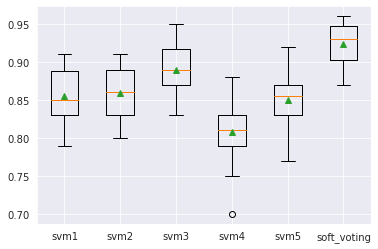

In [57]:
# compare soft voting ensemble to standalone classifiers
# get the models to evaluate
svm_models = get_svm_models()
    
# evaluate the models and store results
results, names = process_models(svm_models, x_train, y_train)

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# make a prediction with a soft voting ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

models = list()

# define the base models
svm_models = set_svm_models(models)

# define the soft voting ensemble
ensemble = VotingClassifier(estimators=svm_models, voting='soft')

# fit the model on all available data
ensemble.fit(x_train, y_train)

# make a prediction for one example
pred = ensemble.predict(x_test)
accuracy_score(y_test, pred)

Despues de hacer los respectivos analisis, notamos que el approach de Vorting Soft resulto ser mas efectivo en accuracy que el Hard. **Soft = 0,82** VS **Hard = 0.79** de accuraccy. Nos quedaremos con el Soft.

### Ensamble Stacking

Vamos a utilizar KNN, SV, Random Forest y Regresion Lineal.

Tambien vamos a definir un regresor de Stacking del modulo de Scikit Learn’s, seteando los estimadores base como los modelos base y como estimador finaluna regresion lineal con 5 cross folds.

In [50]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression()),
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

Luego, vamos a fittear los modelos base y predecir la data de test que ya habiamos previamente separado en train (80%) y test (20%) para asi poder comparar los resultado con el ensamble regresor.

In [51]:
# Entrenamos cada modelo con una validación cruzada
def evaluate_model(model, x, y):
    cv = KFold(n_splits=5)
    scores = cross_val_score(model, x, y, scoring='r2', cv=cv, verbose=1, n_jobs=2, error_score='raise')
    return scores

Calculamos los puntajes en validación cruzada los modelos

In [52]:
import time
from collections import defaultdict

model_scores = defaultdict()

for name, model in base_models:
    print("-------------- {} --------------".format(name))
    start_time = time.time()
    model_scores[name] = evaluate_model(model, x_train, y_train)
    end_time = time.time()

    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")

print("-------Stacked Ensemble-------")
start_time = time.time()
model_scores['Stacking'] = evaluate_model(stacked,x_train, y_train)
end_time = time.time()
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")

-------------- KNN --------------


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Computation Time: 2.778773069381714
----------------------------------

-------------- SVR --------------


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 11.1min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Computation Time: 665.5892972946167
----------------------------------

-------------- Random Forest --------------


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Computation Time: 68.72992610931396
----------------------------------

-------------- Linear Regression --------------


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Computation Time: 0.3449859619140625
----------------------------------

-------Stacked Ensemble-------


/home/ivanloyarte/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Computation Time: 3091.487542629242
----------------------------------


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 51.5min finished


El top 3 de los mejores modelos son:
    
    1. KNN
    2. Random Forest
    3. Ensamble de Stacking
    
Random Forest y el Ensamble estan a la par, mientras que KNN se separa por un muy pequeño porcentaje. El ensamble logra obtener grandes reusltados dada su naturaleza. El ensamble logra optimizar las mejores combincaiones lineales de los modelos permitiendonos obtener una mejor mezcla de diversidad de cada modelo y de cada predicción.
La unica contra que parece tener el ensamble es el tiempo computacional que tarda, es por ese motivo, y porque la metrica da levemente mejor, que en este caso, optamos por mencionar que KNN resulta superior.

In [53]:
#Funcion para plotear a performance
def plot_results(model_scores, name):

    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    print(model_names)
    print(results)
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            x=[abs(x) for x in result],
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )

    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [70]:
model_scores

defaultdict(None,
            {'KNN': array([0.7916919 , 0.78750079, 0.80132562, 0.78196079, 0.80766544]),
             'SVR': array([-0.04149322, -0.03395958, -0.04301916, -0.03758395, -0.03951549]),
             'Random Forest': array([0.91264912, 0.91748904, 0.91106146, 0.9095985 , 0.91909794]),
             'Linear Regression': array([0.77886179, 0.78692218, 0.78899079, 0.78652763, 0.79028369]),
             'Stacking': array([0.91304408, 0.91666211, 0.91214027, 0.909469  , 0.91942806])})

In [55]:
model_names = list(model_scores.keys())
results = [[abs(x) for x in model_scores[model]] for model in model_names]
print(model_names)
print(results)

['KNN', 'SVR', 'Random Forest', 'Linear Regression', 'Stacking']
[[0.791691898004958, 0.787500791701287, 0.8013256198681664, 0.781960788438601, 0.8076654385019967], [0.04149321903527525, 0.03395957911829428, 0.04301915640392173, 0.03758395344702903, 0.03951549293768819], [0.9126491177928887, 0.9174890360314049, 0.9110614573247702, 0.9095984951693854, 0.9190979379321212], [0.7788617920015115, 0.7869221761134517, 0.788990786634186, 0.786527634479802, 0.7902836913296807], [0.9130440764026166, 0.9166621124536924, 0.9121402664864907, 0.9094690019508661, 0.9194280586274756]]


Tomaremos el valor absoluto de todos los puntajes.

In [81]:
model_scores = pd.DataFrame(model_scores)
model_scores.describe().T[['mean', 'min', 'max']]

,mean,min,max
KNN,0.794029,0.781961,0.807665
SVR,-0.039114,-0.043019,-0.033960
Random Forest,0.913979,0.909598,0.919098
Linear Regression,0.786317,0.778862,0.790284
Stacking,0.914149,0.909469,0.919428


Text(0, 0.5, 'R²')

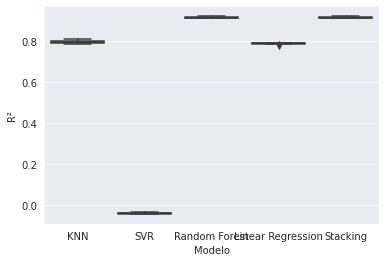

In [75]:
ax = sns.boxplot(data=model_scores)
ax.set_xlabel('Modelo')
ax.set_ylabel('R²')

In [ ]:
regression_scatter()

In [ ]:
# evaluar un modelo dado usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
# obtener el ds
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

In [66]:
def process_models(models, X, y):
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    return results, names

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


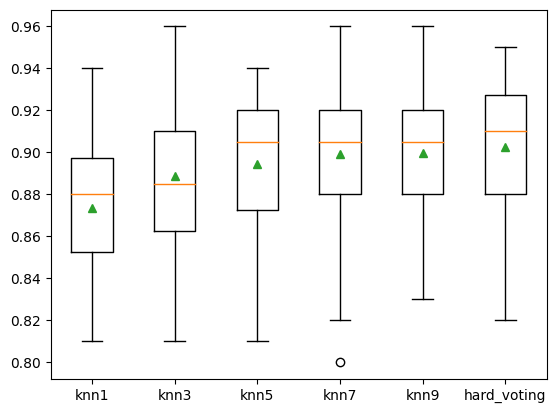

In [67]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_knn_models()

# evaluate the models and store results
results, names = process_models(models, X, y)

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [68]:
# define the base models
def set_knn_models(models):
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    return models[:]


In [69]:
# Si elegimos hard voting

# make a prediction with a hard voting ensemble

k_models = list()

knn_models = set_knn_models(k_models)

# define the hard voting ensemble
ensemble = VotingClassifier(estimators=knn_models, voting='hard')

# fit the model on all available data
ensemble.fit(x_train, y_train)

# make a prediction for one example
pred = ensemble.predict(x_test)
accuracy_score(y_test, pred)

0.057215472353087035

##### Soft Voting

In [70]:
# define the base models
def set_svm_models(models):
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    return models[:]

In [71]:
# get a voting ensemble of models
def get_svm_voting():
    # define the base models
    models = list()
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

In [72]:
# get a list of models to evaluate
def get_svm_models():
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft_voting'] = get_svm_voting()
    return models

>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.924 (0.026)


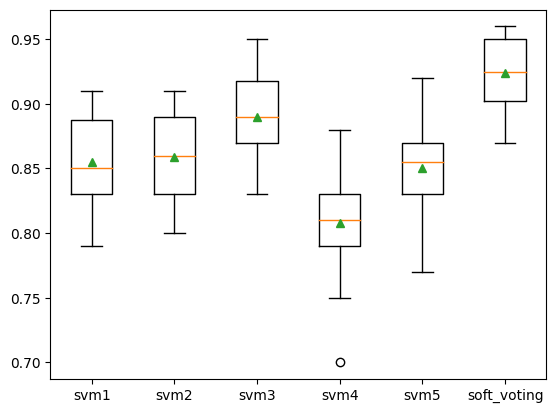

In [73]:
# compare soft voting ensemble to standalone classifiers
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
svm_models = get_svm_models()
    
# evaluate the models and store results
results, names = process_models(svm_models, X, y)

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# make a prediction with a soft voting ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

models = list()

# define the base models
svm_models = set_svm_models(models)

# define the soft voting ensemble
ensemble = VotingClassifier(estimators=svm_models, voting='soft')

# fit the model on all available data
ensemble.fit(x_train, y_train)

# make a prediction for one example
pred = ensemble.predict(x_test)
accuracy_score(y_test, pred)

Despues de hacer los respectivos analisis, notamos que el approach de Vorting Soft resulto ser mas efectivo en accuracy que el Hard. **Soft = 0,82** VS **Hard = 0.79** de accuraccy. Nos quedaremos con el Soft.

### Ensamble Stacking

In [56]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    print(model_names)
    print(results)
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

Vamos a utilizar KNN, SV, Random Forest y Regresion Lineal.

Tambien vamos a definir un regresor de Stacking del modulo de Scikit Learn’s, seteando los estimadores base como los modelos base y como estimador finaluna regresion lineal con 5 cross folds.

In [57]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression()),
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

Luego, vamos a fittear los modelos base y predecir la data de test que ya habiamos previamente separado en train (80%) y test (20%) para asi poder comparar los resultado con el ensamble regresor. 

In [58]:
import time
from collections import defaultdict

#Guarda los scores de cada modelo
model_scores = defaultdict()

for name, model in base_models:
    start_time = time.time()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    end_time = time.time()
    
    r2 = model.score(x_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared = False)
    model_scores[name] = r2
    
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
    
start_time = time.time()
stacked.fit(x_train, y_train)    
stacked_prediction = stacked.predict(x_test)
end_time = time.time()
stacked_r2 = stacked.score(x_test, y_test)
model_scores['Stacking'] = stacked_r2
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")

-------KNN-------
Coefficient of determination: 0.757085578353342
Root Mean Squared Error: 75793.99766203108
Computation Time: 0.20350384712219238
----------------------------------

-------SVR-------
Coefficient of determination: -0.036801193079063044
Root Mean Squared Error: 156587.07384473557
Computation Time: 178.1650948524475
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.7345270046677944
Root Mean Squared Error: 79235.23299863655
Computation Time: 21.569891929626465
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.6009578953777688
Root Mean Squared Error: 97144.3452582448
Computation Time: 0.025851011276245117
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.7284435299082954
Root Mean Squared Error: 80137.95242010949
Computation Time: 859.7234020233154
----------------------------------


El top 3 de los mejores modelos son:
    
    1. KNN
    2. Random Forest
    3. Ensamble de Stacking
    
Random Forest y el Ensamble estan a la par, mientras que KNN se separa por un muy pequeño porcentaje. El ensamble logra obtener grandes reusltados dada su naturaleza. El ensamble logra optimizar las mejores combincaiones lineales de los modelos permitiendonos obtener una mejor mezcla de diversidad de cada modelo y de cada predicción.
La unica contra que parece tener el ensamble es el tiempo computacional que tarda, es por ese motivo, y porque la metrica da levemente mejor, que en este caso, optamos por mencionar que KNN resulta superior.

In [59]:
model_scores

defaultdict(None,
            {'KNN': 0.757085578353342,
             'SVR': -0.036801193079063044,
             'Random Forest': 0.7345270046677944,
             'Linear Regression': 0.6009578953777688,
             'Stacking': 0.7284435299082954})

In [61]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

['KNN', 'SVR', 'Random Forest', 'Linear Regression', 'Stacking']
[0.757085578353342, -0.036801193079063044, 0.7345270046677944, 0.6009578953777688, 0.7284435299082954]


ValueError: 
    Invalid value of type 'numpy.float64' received for the 'y' property of box
        Received value: 0.757085578353342

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

## Conclusiones